In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

2025-07-31 11:43:46.247619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753942426.264771    4823 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753942426.269712    4823 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753942426.283122    4823 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753942426.283147    4823 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753942426.283149    4823 computation_placer.cc:177] computation placer alr

In [2]:
base_dir = 'dataset/images_train_test_val'
img_size = 128
batch_size = 32
num_classes = 21 

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "train"),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7350 images belonging to 21 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "validation"),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2100 images belonging to 21 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "test"),
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 1050 images belonging to 21 classes.


In [7]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

I0000 00:00:1753942476.152851    4823 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [8]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/home/maharshi/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1753944127.636169    5076 service.cc:152] XLA service 0x7f7fa8003040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753944127.636235    5076 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-07-31 12:12:07.799204: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753944129.202451    5076 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-31 12:12:12.187023: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.88GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  2/230 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.0312 - loss: 3.3841 

I0000 00:00:1753944135.176339    5076 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


230/230 ━━━━━━━━━━━━━━━━━━━━ 174s 705ms/step - accuracy: 0.6683 - loss: 1.1888 - val_accuracy: 0.8314 - val_loss: 0.5850
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 68s 294ms/step - accuracy: 0.8290 - loss: 0.5775 - val_accuracy: 0.8605 - val_loss: 0.4511
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 64s 278ms/step - accuracy: 0.8709 - loss: 0.4144 - val_accuracy: 0.8729 - val_loss: 0.4119
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 68s 297ms/step - accuracy: 0.8907 - loss: 0.3241 - val_accuracy: 0.8714 - val_loss: 0.4012
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 68s 294ms/step - accuracy: 0.9120 - loss: 0.2725 - val_accuracy: 0.8810 - val_loss: 0.3745
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 67s 291ms/step - accuracy: 0.9279 - loss: 0.2309 - val_accuracy: 0.8819 - val_loss: 0.3620
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 68s 294ms/step - accuracy: 0.9442 - loss: 0.1850 - val_accuracy: 0.8829 - val_loss: 0.3600
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 72s 312ms/step - accuracy: 0.9465 - loss: 0.1709 - va

In [11]:
model.save('model/Xception.keras')

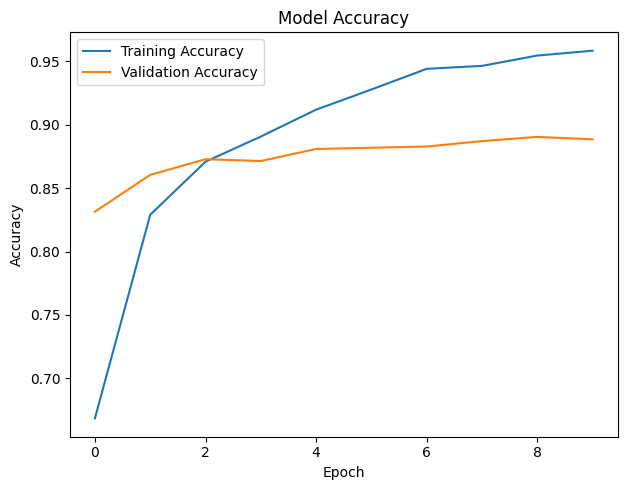

In [12]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

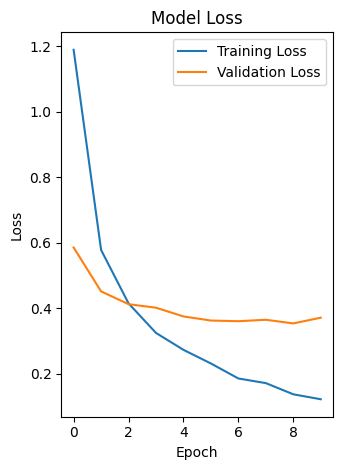

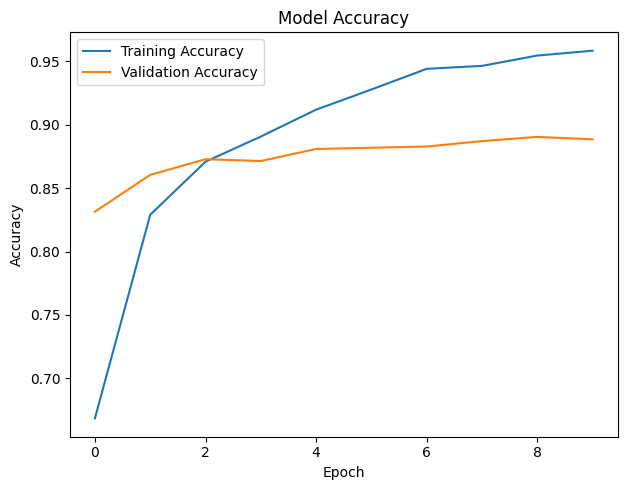

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

plot_training_history(history)

In [14]:
model = load_model('model/Xception.keras')

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.8933 - loss: 0.3928
Test Accuracy: 89.33%
Test Loss: 0.3928


In [16]:
test_generator.reset()
predictions = []
for i in range(len(test_generator)):
    pred = model.predict(test_generator[i][0])
    predictions.append(np.argmax(pred, axis=1)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

In [17]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_classes, predictions, target_names=class_labels))

Classification Report:
                   precision    recall  f1-score   support

     agricultural       1.00      0.98      0.99        50
         airplane       0.94      0.94      0.94        50
  baseballdiamond       0.91      0.86      0.89        50
            beach       0.93      1.00      0.96        50
        buildings       0.78      0.94      0.85        50
        chaparral       1.00      1.00      1.00        50
 denseresidential       0.76      0.62      0.68        50
           forest       0.98      1.00      0.99        50
          freeway       0.81      1.00      0.89        50
       golfcourse       0.85      0.88      0.86        50
           harbor       1.00      0.92      0.96        50
     intersection       0.90      0.86      0.88        50
mediumresidential       0.67      0.78      0.72        50
   mobilehomepark       0.80      0.80      0.80        50
         overpass       0.97      0.72      0.83        50
       parkinglot       0.93    

In [18]:
precision = precision_score(true_classes, predictions, average='weighted')
recall = recall_score(true_classes, predictions, average='weighted')
f1 = f1_score(true_classes, predictions, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8981
Recall: 0.8933
F1 Score: 0.8927


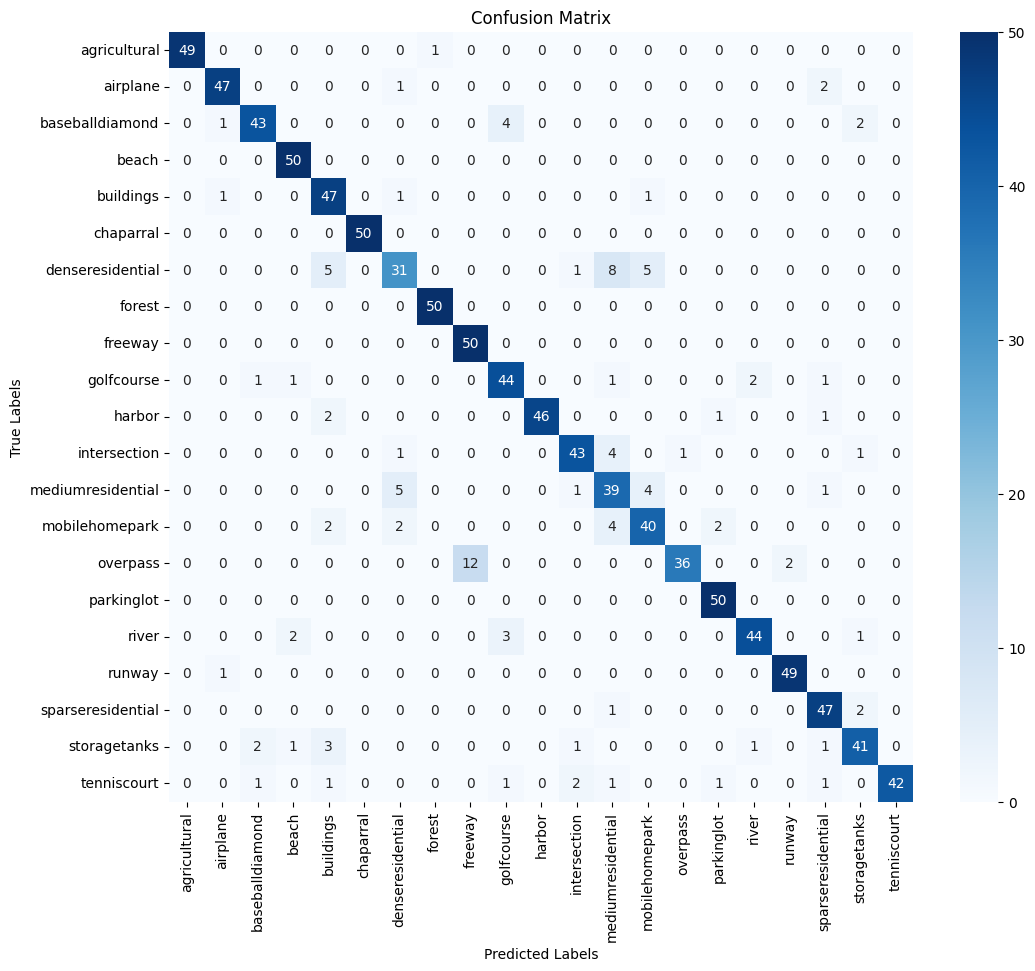

In [19]:
def plot_confusion_matrix(true_classes, predictions, class_labels):
    cm = confusion_matrix(true_classes, predictions)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(true_classes, predictions, class_labels)

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

class_names = [
    "agricultural", "airplane", "baseballdiamond", "beach", "buildings",
    "chaparral", "denseresidential", "forest", "freeway", "golfcourse",
    "harbor", "intersection", "mediumresidential", "mobilehomepark", 
    "overpass", "parkinglot", "river", "runway", "sparseresidential", 
    "storagetanks", "tenniscourt"
]

In [21]:
def classify_new_image(model_path, img_path, img_size=128):
    model = load_model(model_path)
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence_score = predictions[0][predicted_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
    plt.show()

    return predicted_class, confidence_score

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


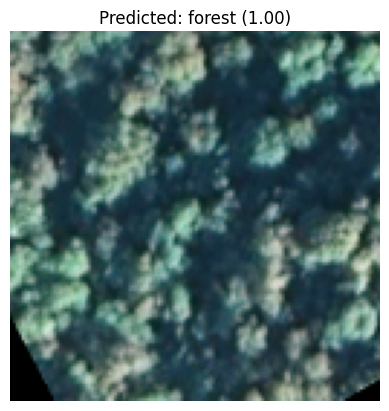

Predicted class: forest


In [22]:
predicted_class, confidence = classify_new_image('model/Xception.keras', 'dataset/images_train_test_val/test/forest/forest_000021.png')
print(f"Predicted class: {predicted_class}")

In [23]:
total_inference_time = 0
num_samples = len(test_generator)

In [24]:
for i in range(num_samples):
    img, label = test_generator[i]  # Get the image and label

    # Start timing
    start_time = time.time()
    model.predict(img)  # Perform inference
    end_time = time.time()

    # Calculate time taken for this prediction and add to total
    inference_time = end_time - start_time
    total_inference_time += inference_time

# Calculate average inference time per image
average_inference_time = total_inference_time / num_samples
print(f"Average Inference Time per Image: {average_inference_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━